In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Credit_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [3]:
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [4]:
dummies = pd.get_dummies(df[['Gender', 'Student', 'Married','Ethnicity']])

In [5]:
dummies

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
395,0,1,1,0,0,1,0,0,1
396,0,1,1,0,1,0,1,0,0
397,1,0,1,0,0,1,0,0,1
398,0,1,1,0,0,1,0,0,1


In [6]:
y = df.Balance

# Drop the column with the independent variable (Balance), and columns for which we created dummy variables
X_ = df.drop(['ID','Gender', 'Student', 'Married','Ethnicity','Balance'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['Gender_Male', 'Student_Yes', 'Married_Yes','Ethnicity_African American','Ethnicity_Asian']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      400 non-null    float64
 1   Limit                       400 non-null    float64
 2   Rating                      400 non-null    float64
 3   Cards                       400 non-null    float64
 4   Age                         400 non-null    float64
 5   Education                   400 non-null    float64
 6   Gender_Male                 400 non-null    uint8  
 7   Student_Yes                 400 non-null    uint8  
 8   Married_Yes                 400 non-null    uint8  
 9   Ethnicity_African American  400 non-null    uint8  
 10  Ethnicity_Asian             400 non-null    uint8  
dtypes: float64(6), uint8(5)
memory usage: 20.8 KB


In [7]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
0,14.891,3606.0,283.0,2.0,34.0,11.0,1,0,1,0,0
1,106.025,6645.0,483.0,3.0,82.0,15.0,0,1,1,0,1
2,104.593,7075.0,514.0,4.0,71.0,11.0,1,0,0,0,1
3,148.924,9504.0,681.0,3.0,36.0,11.0,0,0,0,0,1
4,55.882,4897.0,357.0,2.0,68.0,16.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100.0,307.0,3.0,32.0,13.0,1,0,1,0,0
396,13.364,3838.0,296.0,5.0,65.0,17.0,1,0,0,1,0
397,57.872,4171.0,321.0,5.0,67.0,12.0,0,0,1,0,0
398,37.728,2525.0,192.0,1.0,44.0,13.0,1,0,1,0,0


In [8]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [9]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#scale both test data and train data
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [11]:
X_train

array([[-0.80432754,  0.34104151,  0.24680251, ..., -1.28243054,
         1.66274047, -0.5821616 ],
       [ 0.59124852,  0.22624886,  0.31322539, ...,  0.77976933,
         1.66274047, -0.5821616 ],
       [-0.55660604,  0.16885254,  0.14052591, ...,  0.77976933,
         1.66274047, -0.5821616 ],
       ...,
       [-0.89575556, -0.37506733, -0.36428798, ..., -1.28243054,
         1.66274047, -0.5821616 ],
       [-0.97972845, -0.78536138, -0.78939441, ...,  0.77976933,
         1.66274047, -0.5821616 ],
       [-0.40726871,  0.81007711,  0.73833182, ...,  0.77976933,
        -0.60141677, -0.5821616 ]])

In [12]:
#The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model. 
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))          # Calculate the test MSE

Income                       -258.247943
Limit                         308.290628
Rating                        280.723028
Cards                          18.444883
Age                           -13.149134
Education                      -1.365670
Gender_Male                    -0.187237
Student_Yes                   120.251810
Married_Yes                    -0.193154
Ethnicity_African American     -6.504676
Ethnicity_Asian                 4.559779
dtype: float64
21484.798442363983


In [13]:
ridge2 = Ridge(alpha = 10**10)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Income                        6.620178e-06
Limit                         1.243286e-05
Rating                        1.247008e-05
Cards                         1.422880e-06
Age                           1.604647e-07
Education                     7.805194e-08
Gender_Male                  -1.243125e-06
Student_Yes                   3.567213e-06
Married_Yes                   5.338300e-07
Ethnicity_African American   -6.313531e-07
Ethnicity_Asian               4.763231e-08
dtype: float64
256386.51175872114


In [14]:
ridge3 = Ridge(alpha = 0)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge3.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Income                       -262.323932
Limit                         330.485552
Rating                        262.556684
Cards                          19.237930
Age                           -12.880847
Education                      -1.563821
Gender_Male                     0.001889
Student_Yes                   120.955116
Married_Yes                    -0.029164
Ethnicity_African American     -6.342409
Ethnicity_Asian                 4.672336
dtype: float64
21112.08624087698


In [15]:
#We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios 
#from the null model containing only the intercept, to the least squares fit
alphas = 10**np.linspace(5,-2,100)*0.5
alphas

array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2.26743925e+03,
       1.92676430e+03, 1.63727458e+03, 1.39127970e+03, 1.18224471e+03,
       1.00461650e+03, 8.53676324e+02, 7.25414389e+02, 6.16423370e+02,
       5.23807876e+02, 4.45107543e+02, 3.78231664e+02, 3.21403656e+02,
       2.73113861e+02, 2.32079442e+02, 1.97210303e+02, 1.67580133e+02,
       1.42401793e+02, 1.21006413e+02, 1.02825615e+02, 8.73764200e+01,
       7.42484131e+01, 6.30928442e+01, 5.36133611e+01, 4.55581378e+01,
       3.87131841e+01, 3.28966612e+01, 2.79540509e+01, 2.37540508e+01,
       2.01850863e+01, 1.71523464e+01, 1.45752653e+01, 1.23853818e+01,
       1.05245207e+01, 8.94324765e+00, 7.59955541e+00, 6.45774833e+00,
      

In [16]:
ridge = Ridge()
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 11)

Text(0, 0.5, 'weights')

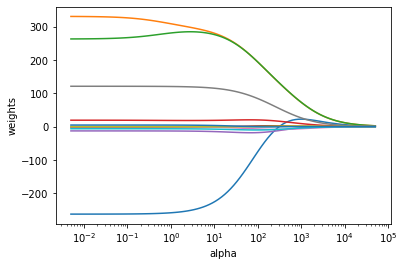

In [17]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Text(0, 0.5, 'weights')

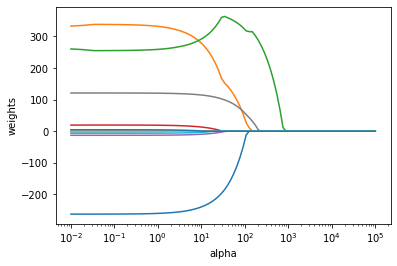

In [18]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [19]:
lasso2 = Lasso(alpha=100,max_iter = 10000)
lasso2.fit(X_train, y_train)             # Fit a Lasso regression on the training data
pred2 = lasso2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(lasso2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Income                         -0.000000
Limit                           0.000000
Rating                        289.578449
Cards                           0.000000
Age                            -0.000000
Education                       0.000000
Gender_Male                    -0.000000
Student_Yes                     6.501953
Married_Yes                    -0.000000
Ethnicity_African American     -0.000000
Ethnicity_Asian                 0.000000
dtype: float64
94944.66366064723


In [20]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso2.coef_, index=X.columns)

Income                         -0.000000
Limit                           0.000000
Rating                        289.578449
Cards                           0.000000
Age                            -0.000000
Education                       0.000000
Gender_Male                    -0.000000
Student_Yes                     6.501953
Married_Yes                    -0.000000
Ethnicity_African American     -0.000000
Ethnicity_Asian                 0.000000
dtype: float64

In [21]:
lasso3 = Lasso(alpha=20,max_iter = 10000)
lasso3.fit(X_train, y_train)             # Fit a Lasso regression on the training data
pred3 = lasso3.predict(X_test)           # Use this model to predict the test data
lasso3.fit(X_train, y_train)
print(pd.Series(lasso3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

Income                       -171.348607
Limit                         142.828764
Rating                        359.257739
Cards                           0.000000
Age                            -0.000000
Education                       0.000000
Gender_Male                    -0.000000
Student_Yes                    95.486860
Married_Yes                    -0.000000
Ethnicity_African American     -0.000000
Ethnicity_Asian                 0.000000
dtype: float64
32639.67138048624


In [22]:
pd.Series(lasso3.coef_, index=X.columns)

Income                       -171.348607
Limit                         142.828764
Rating                        359.257739
Cards                           0.000000
Age                            -0.000000
Education                       0.000000
Gender_Male                    -0.000000
Student_Yes                    95.486860
Married_Yes                    -0.000000
Ethnicity_African American     -0.000000
Ethnicity_Asian                 0.000000
dtype: float64

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdas = np.linspace(0.01,1000,num=1000)
scoresCV = []
for l in lambdas:
    RidgeReg = Ridge(alpha=l)
    scoreCV = cross_val_score(RidgeReg, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df = pd.DataFrame(scoresCV,columns=['Lambda','Validation Error'])
df.sort_values(by='Validation Error',inplace=True)

In [24]:
df

,Lambda,Validation Error
1,1.010991,9558.239995
0,0.010000,9573.477682
2,2.011982,9583.085669
3,3.012973,9628.356883
4,4.013964,9690.674726
...,...,...
995,995.996036,104964.474629
996,996.997027,105008.350658
997,997.998018,105052.186492
998,998.999009,105095.982187


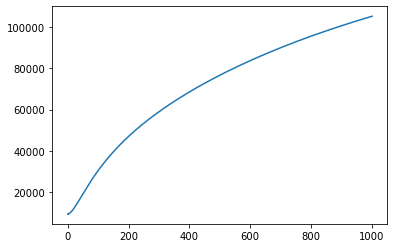

In [25]:
plt.plot(df.Lambda,df['Validation Error'])

In [26]:
df

,Lambda,Validation Error
1,1.010991,9558.239995
0,0.010000,9573.477682
2,2.011982,9583.085669
3,3.012973,9628.356883
4,4.013964,9690.674726
...,...,...
995,995.996036,104964.474629
996,996.997027,105008.350658
997,997.998018,105052.186492
998,998.999009,105095.982187


In [27]:
ridgecv = RidgeCV(alphas = alphas,cv = 10, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.9153691401476849

In [28]:
ridge5 = Ridge(alpha = ridgecv.alpha_)
ridge5.fit(X_train, y_train)
y_pred=ridge5.predict(X_test)
mean_squared_error(y_test, y_pred)

21456.206425021588

In [29]:
ridge5.fit(X, y)
pd.Series(ridge5.coef_, index = X.columns)

Income                         -7.796699
Limit                           0.188793
Rating                          1.167075
Cards                          17.511753
Age                            -0.621810
Education                      -1.014576
Gender_Male                    10.197426
Student_Yes                   414.869564
Married_Yes                    -9.096059
Ethnicity_African American     -9.892844
Ethnicity_Asian                 7.129174
dtype: float64

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdas = np.linspace(0.01,1000,num=1000)
scoresCV = []
for l in lambdas:
    lassoReg = Lasso(alpha=l,max_iter=10000)
    scoreCV = cross_val_score(lassoReg, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df = pd.DataFrame(scoresCV,columns=['Lambda','Validation Error'])
df

,Lambda,Validation Error
0,0.010000,9573.001270
1,1.010991,9515.471910
2,2.011982,9500.365358
3,3.012973,9529.612445
4,4.013964,9592.242457
...,...,...
995,995.996036,200406.247147
996,996.997027,200406.247147
997,997.998018,200406.247147
998,998.999009,200406.247147


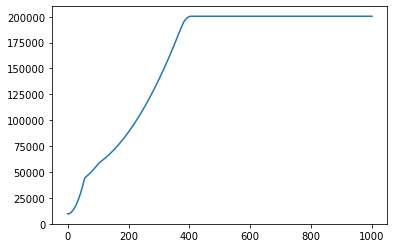

In [31]:
plt.plot(df.Lambda,df['Validation Error'])

In [32]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

21610.721077299728

In [33]:
lassocv.alpha_

1.4918236201416701

In [34]:
pd.Series(lasso.coef_, index=X.columns)

Income                       -255.484909
Limit                         319.222523
Rating                        267.039580
Cards                          17.682774
Age                           -11.920649
Education                      -0.000000
Gender_Male                    -0.000000
Student_Yes                   118.979265
Married_Yes                    -0.000000
Ethnicity_African American     -5.513636
Ethnicity_Asian                 3.455988
dtype: float64